In [16]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.datasets import load_digits

# The digits dataset
data=load_digits()

In [17]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [20]:
X=data.images
y=data.target

In [23]:
X_df= pd.DataFrame()
lst_images=[]
for i in X:
    #print(i.ravel()).shape)
    lst_images.append(i.ravel())   #converting a 2d into a 1d row

In [24]:
len(lst_images)

1797

In [26]:
X_df=pd.DataFrame(lst_images)


In [27]:
X_df.shape

(1797, 64)

### Performing Data exploration

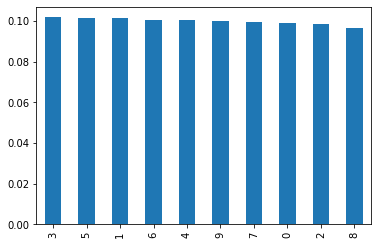

In [32]:
import matplotlib as plt
y_df=pd.Series(y)
y_df.value_counts(normalize=True).plot(kind='bar')

### Applying Ensemble Modelling

In [35]:
X_train,X_val,y_train,y_val=train_test_split(X_df,y, random_state=42,stratify=y)

In [36]:
print(f"Training set has, {X_train.shape} images")
print(f"Testing set has, {X_val.shape} images")

Training set has, (1347, 64) images
Testing set has, (450, 64) images


### Initiate DT, RF & ET models

In [37]:
rf=RandomForestClassifier(random_state=42)
dt=DecisionTreeClassifier(random_state=42)
et=ExtraTreesClassifier(random_state=42)

## Model Evaluation
---

Which one has a higher `cross_val_score`?

In [43]:
cross_val_score(rf,X_train,y_train,cv=5).mean()

/Users/ikhyvicky/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ikhyvicky/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ikhyvicky/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ikhyvicky/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ikhyvicky/anaconda3/l

0.9398519031834969

In [39]:
cross_val_score(et,X_train,y_train,cv=5).mean()

/Users/ikhyvicky/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ikhyvicky/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ikhyvicky/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ikhyvicky/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ikhyvicky/anaconda3/l

0.9539282747124392

In [40]:
cross_val_score(dt,X_train,y_train,cv=5).mean()

0.8379667168443437

In [44]:
rf.fit(X_train,y_train)

/Users/ikhyvicky/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [47]:
for estimator in rf.estimators_:
        print(estimator.tree_.max_depth)

15
14
16
14
13
12
13
11
13
13
